In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

np.random.seed(0)

In [2]:
def check_stats_significance(p_value, threshold=0.05):
    if p_value < threshold:
        return f'{p_value:.4f} < {threshold:.2f}: Reject the null hypothesis H0; the result statistically significant'
    else:
        return f'{p_value:.4f} >= {threshold:.2f}: Failed to reject the null hypothesis H0; the result not statistically significant'

# 1. 1-sample z-test
## 1.1 1-sample, 2-sided test

- $H_0$: $\mu = \mu_0$
- $H_1$: $\mu \neq \mu_0$

In [3]:
# data
N = 100
mu = 0.2
sigma = 1

x = np.random.randn(N)*sigma + mu

# Compare to mu_0 = 0.2
mu_0 = 0.2

#### API

In [4]:
test_statistic, p_value = ztest(x, value=mu_0)

print(p_value)
print(check_stats_significance(p_value))

0.5549035151647227
0.5549 >= 0.05: Failed to reject the null hypothesis H0; the result not statistically significant


#### Implementation

In [5]:
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)

z = (mu_hat - mu_0) / (sigma_hat / np.sqrt(N)) 
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))

p_value = p_right + p_left

print(z, p_value)
print(check_stats_significance(p_value))

0.5904283402851698 0.5549035151647228
0.5549 >= 0.05: Failed to reject the null hypothesis H0; the result not statistically significant


## 1.2 1-sample, 1-sided test
- $H_0$: $\mu \leq \mu_0$
- $H_1$: $\mu > \mu_0$
  

In [6]:
# data
N = 100
mu = 0.2
sigma = 1

x = np.random.randn(N)*sigma + mu

# Compare to mu_0 = 0
mu_0 = 0

#### API

In [7]:
test_statistic, p_value = ztest(x-mu_0, value=mu_0, alternative='larger')

print(p_value)
print(check_stats_significance(p_value))

0.0033441565019428658
0.0033 < 0.05: Reject the null hypothesis H0; the result statistically significant


#### Implementation

In [8]:
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)

z = (mu_hat - mu_0) / (sigma_hat / np.sqrt(N))
p_value = 1 - norm.cdf(z)

print(z, p_value)
print(check_stats_significance(p_value))

2.7119775124741476 0.003344156501942863
0.0033 < 0.05: Reject the null hypothesis H0; the result statistically significant


# 2. 2-sample z-test
## 2.1 2-sample, 2-sided test

- $H_0$: $\mu_1 = \mu_2$
- $H_1$: $\mu_1 \neq \mu_2$

In [9]:
# data
N_1 = 100
mu_1 = 0.2
sigma_1 = 1
x_1 = np.random.randn(N_1)*sigma_1 + mu_1

N_2 = 100
mu_2 = 0.5
sigma_2 = 1
x_2 = np.random.randn(N_2)*sigma_2 + mu_2

In [10]:
# Choose mu_0 = 0
mu_0 = 0

#### API

In [11]:
test_statistic, p_value = ztest(x_1, x_2, value=mu_0)

print(p_value)
print(check_stats_significance(p_value))

0.22443591696142684
0.2244 >= 0.05: Failed to reject the null hypothesis H0; the result not statistically significant


#### Implementation

In [12]:
mu_hat_1 = x_1.mean()
mu_hat_2 = x_2.mean()

sq_sigma_hat_1 = x_1.var(ddof=1)
sq_sigma_hat_2 = x_2.var(ddof=1)


y_hat = mu_hat_1 - mu_hat_2
z = (y_hat - mu_0) / np.sqrt(sq_sigma_hat_1/N_1 + sq_sigma_hat_2/N_2)

p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p_value = p_right + p_left

print(z, p_value)
print(check_stats_significance(p_value))

-1.214816943827097 0.2244359169614269
0.2244 >= 0.05: Failed to reject the null hypothesis H0; the result not statistically significant


## 2.2 2-sample, 1-sided test

- $H_0$: $\mu_1 \leq \mu_2$
- $H_1$: $\mu_1 > \mu_2$

In [13]:
# data
N_1 = 100
mu_1 = 0.2
sigma_1 = 1
x_1 = np.random.randn(N_1)*sigma_1 + mu_1

N_2 = 100
mu_2 = 0.5
sigma_2 = 1
x_2 = np.random.randn(N_2)*sigma_2 + mu_2

In [14]:
# Choose mu_0 = 0
mu_0 = 0

#### API

In [15]:
test_statistic, p_value = ztest(x_1, x_2, value=mu_0, alternative='larger')

print(p_value)
print(check_stats_significance(p_value))

0.7736641317815584
0.7737 >= 0.05: Failed to reject the null hypothesis H0; the result not statistically significant


#### Implementation

In [16]:
mu_hat_1 = x_1.mean()
mu_hat_2 = x_2.mean()

sq_sigma_hat_1 = x_1.var(ddof=1)
sq_sigma_hat_2 = x_2.var(ddof=1)


y_hat = mu_hat_1 - mu_hat_2
z = (y_hat - mu_0) / np.sqrt(sq_sigma_hat_1/N_1 + sq_sigma_hat_2/N_2)

p_value = 1 - norm.cdf(z)

print(z, p_value)
print(check_stats_significance(p_value))

-0.7509682956242645 0.7736641317815584
0.7737 >= 0.05: Failed to reject the null hypothesis H0; the result not statistically significant


# 3. Thresholding

In [17]:
# show that we will reject the null hypothesis when the
# null hypothesis is true (false alarm) 5% of the time
num_tests = 10000
results = np.zeros(num_tests)
for i in range(num_tests):
    x1 = np.random.randn(100)
    x2 = np.random.randn(100)
    z, p = ztest(x1, x2)
    results[i] = (p < 0.05)
print(results.mean())

0.0527


# 4. Application

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('data/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Hypothesis testing
- Define
    + $\mu_1$: The mean of fare of people who survive
    + $\mu_2$: The mean of fare of people who not survive
- Assume $x_1$, $x_2$ are normally distributed. Hypothesis testing
    + $H_0$: $\mu_1 = \mu_2$
    + $H_1$: $\mu_1 \neq \mu_2$

In [20]:
x_1 = df[df['Survived'] == 1]['Fare'].dropna().to_numpy()
x_2 = df[df['Survived'] == 0]['Fare'].dropna().to_numpy()

test_statistic, p_value = ztest(x_1, x_2, value=0)

print(p_value)
print(check_stats_significance(p_value))

2.035031103573989e-15
0.0000 < 0.05: Reject the null hypothesis H0; the result statistically significant


#### Visualize

48.39540760233918 66.59699811829475 342
22.117886885245902 31.38820653056397 549


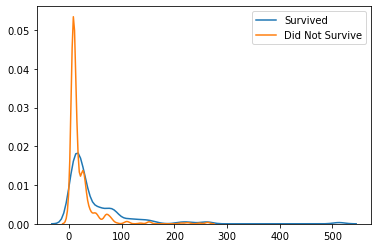

In [21]:
print(x_1.mean(), x_1.std(ddof=1), len(x_1))
print(x_2.mean(), x_2.std(ddof=1), len(x_2))

sns.kdeplot(x_1, label='Survived')
sns.kdeplot(x_2, label='Did Not Survive')
plt.legend();

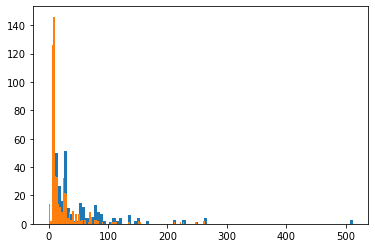

In [22]:
plt.hist(x=x_1, bins=100)
plt.hist(x=x_2, bins=100)

plt.show()